Plant Species Detection

## importing libraries

In [37]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
import shutil
import os
from zipfile import ZipFile as zipfile
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile

## Data Loading

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 71 bytes
 60% 9.00M/15.1M [00:00<00:00, 92.2MB/s]
100% 15.1M/15.1M [00:00<00:00, 132MB/s] 


In [4]:
!kaggle datasets download -d syedabdullahsaad/plant-species

100% 4.19G/4.19G [00:56<00:00, 135MB/s]
100% 4.19G/4.19G [00:57<00:00, 78.7MB/s]


In [7]:
file_name = "/content/plant-species.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')


Done


In [9]:

# paths to the source directory  and the destination directory.
source_directory = '/content/train_a_tensorflow-lite_model_for_identifying_plant_species/train/images'
destination_directory = '/content/train_a_tensorflow-lite_model_for_identifying_plant_species/five_species'

# list of all subdirectories  in the source directory.
plant_species_folders = os.listdir(source_directory)

# Randomly select 5 folders from the list
selected_folders = random.sample(plant_species_folders, 5)

# Create the destination directory if it doesn't exist.
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Copy the selected folders to the destination directory.
for folder in selected_folders:
    source_path = os.path.join(source_directory, folder)
    destination_path = os.path.join(destination_directory, folder)
    shutil.copytree(source_path, destination_path)




## EDA

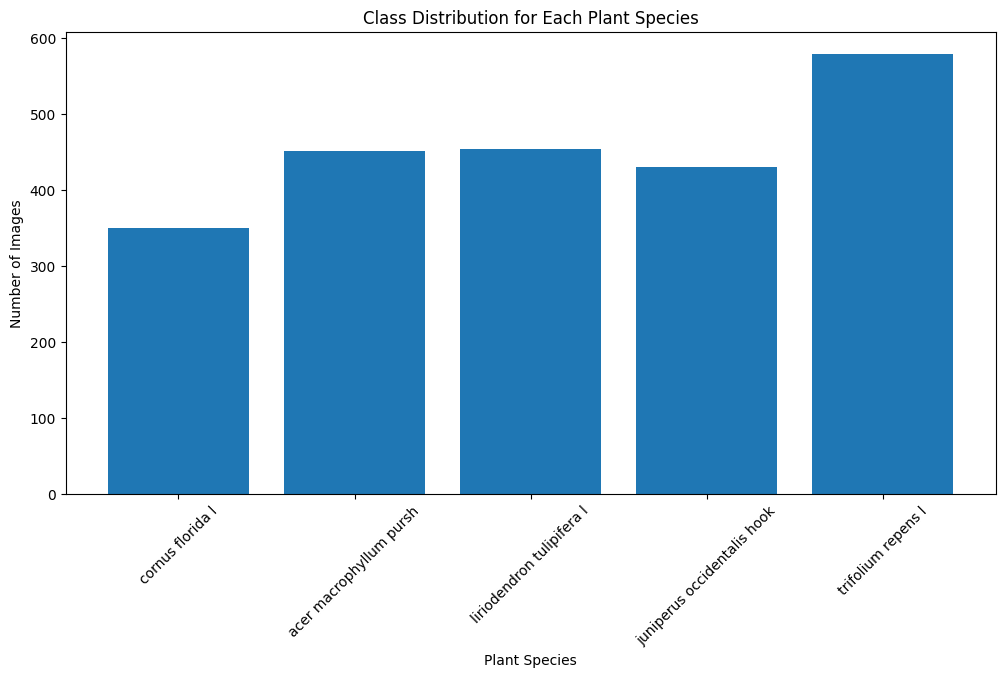

In [18]:


# Define the path to the directory containing the species folders.
data_directory = '/content/train_a_tensorflow-lite_model_for_identifying_plant_species/five_species'

# Get a list of plant species folders.
species_folders = os.listdir(data_directory)

# Initialize dictionaries to store species names and counts.
species_counts = {}
species_names = []

# Iterate through each species folder and count the images.
for species_folder in species_folders:
    species_name = species_folder
    species_names.append(species_name)
    species_path = os.path.join(data_directory, species_folder)
    image_count = len([file for file in os.listdir(species_path) if file.endswith(('.jpg', '.jpeg', '.png'))])
    species_counts[species_name] = image_count

# Plot the class distribution.
plt.figure(figsize=(12, 6))
plt.bar(species_names, species_counts.values())
plt.title('Class Distribution for Each Plant Species')
plt.xlabel('Plant Species')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


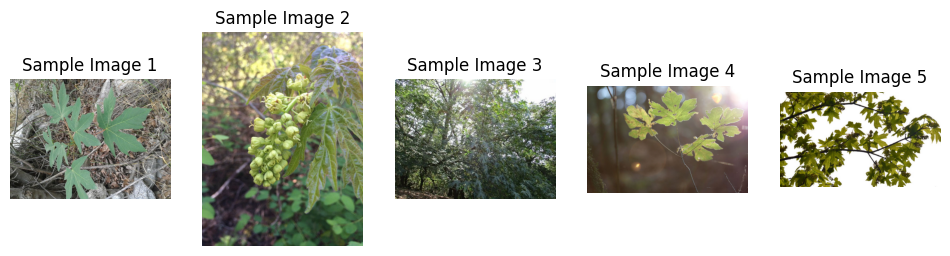

In [26]:
folder_path = '/content/train_a_tensorflow-lite_model_for_identifying_plant_species/five_species/acer macrophyllum pursh'

# List all image files in the folder.
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

# Display a few sample images.
plt.figure(figsize=(12, 6))
for i in range(5):
    image = cv2.imread(image_files[i])
    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Sample Image {i+1}')
    plt.axis('off')
plt.show()


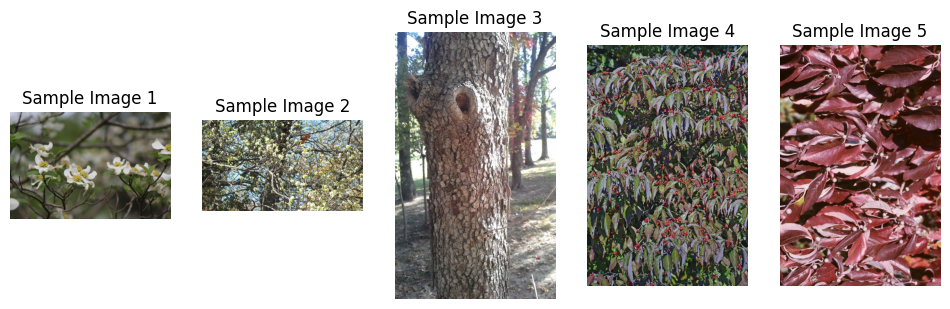

In [25]:
## cornus florida l

folder_path = '/content/train_a_tensorflow-lite_model_for_identifying_plant_species/five_species/cornus florida l'

image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

# Display a few sample images.
plt.figure(figsize=(12, 6))
for i in range(5):
    image = cv2.imread(image_files[i])
    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Sample Image {i+1}')
    plt.axis('off')
plt.show()


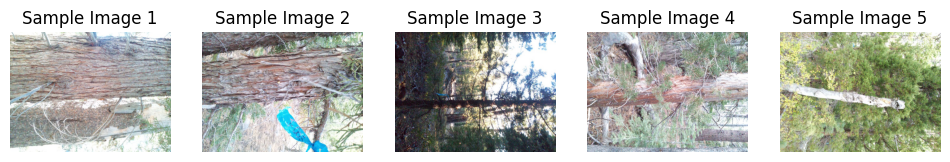

In [27]:
# juniperus occidentalis hook

folder_path = '/content/train_a_tensorflow-lite_model_for_identifying_plant_species/five_species/juniperus occidentalis hook'

# List all image files in the folder.
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

# Display a few sample images.
plt.figure(figsize=(12, 6))
for i in range(5):
    image = cv2.imread(image_files[i])
    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Sample Image {i+1}')
    plt.axis('off')
plt.show()

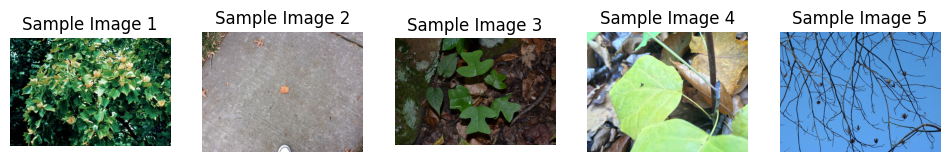

In [28]:
#  liriodendron  tulipifera l
folder_path = '/content/train_a_tensorflow-lite_model_for_identifying_plant_species/five_species/liriodendron tulipifera l'

image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

# Display a few sample images.
plt.figure(figsize=(12, 6))
for i in range(5):
    image = cv2.imread(image_files[i])
    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Sample Image {i+1}')
    plt.axis('off')
plt.show()

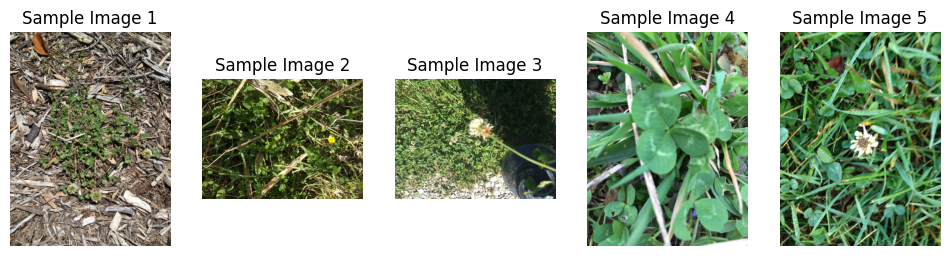

In [29]:
#  trifolium repens l
folder_path = '/content/train_a_tensorflow-lite_model_for_identifying_plant_species/five_species/trifolium repens l'

image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

# Display a few sample images.
plt.figure(figsize=(12, 6))
for i in range(5):
    image = cv2.imread(image_files[i])
    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Sample Image {i+1}')
    plt.axis('off')
plt.show()

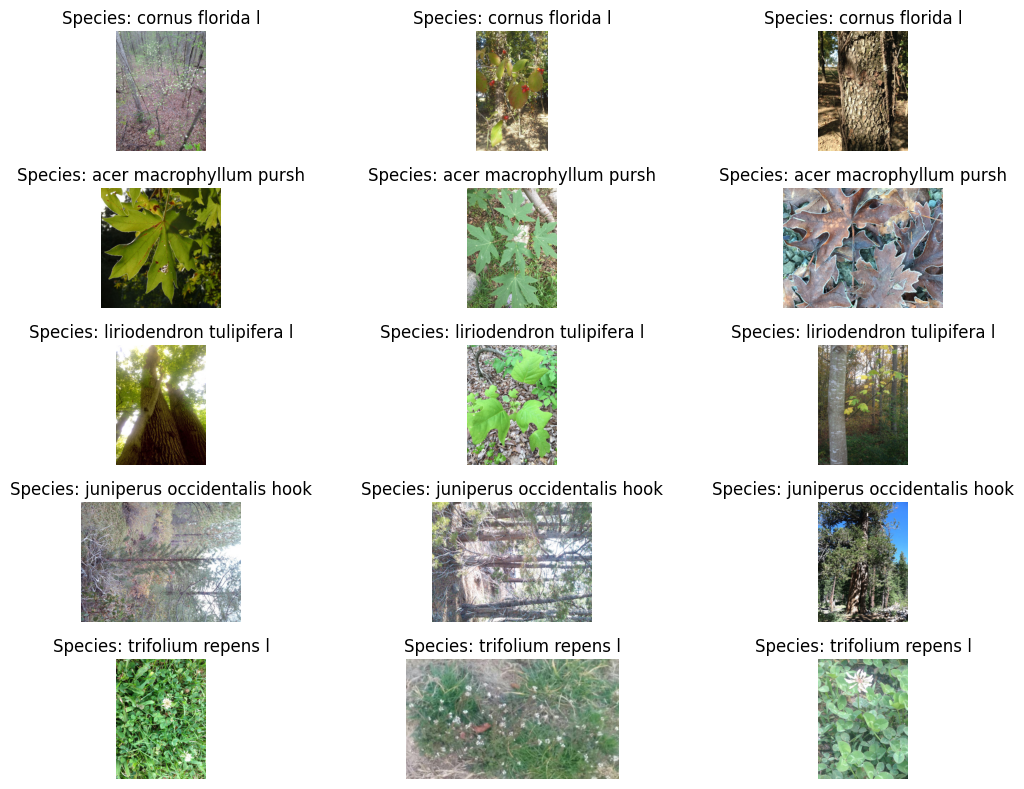

In [21]:
#  list of plant species folders.
species_folders = os.listdir(data_directory)

# number of sample images to display
num_samples = 3

rows = len(species_folders)
cols = num_samples

# figure and axes for displaying the images.
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

# Iterate through each species folder and display sample images.
for i, species_folder in enumerate(species_folders):
    species_path = os.path.join(data_directory, species_folder)
    image_files = [file for file in os.listdir(species_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

    # Randomly select num_samples images from the folder.
    selected_images = random.sample(image_files, num_samples)

    for j, image_file in enumerate(selected_images):
        image_path = os.path.join(species_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Display the image on the corresponding subplot.
        axes[i, j].imshow(image)
        axes[i, j].set_title(f'Species: {species_folder}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()


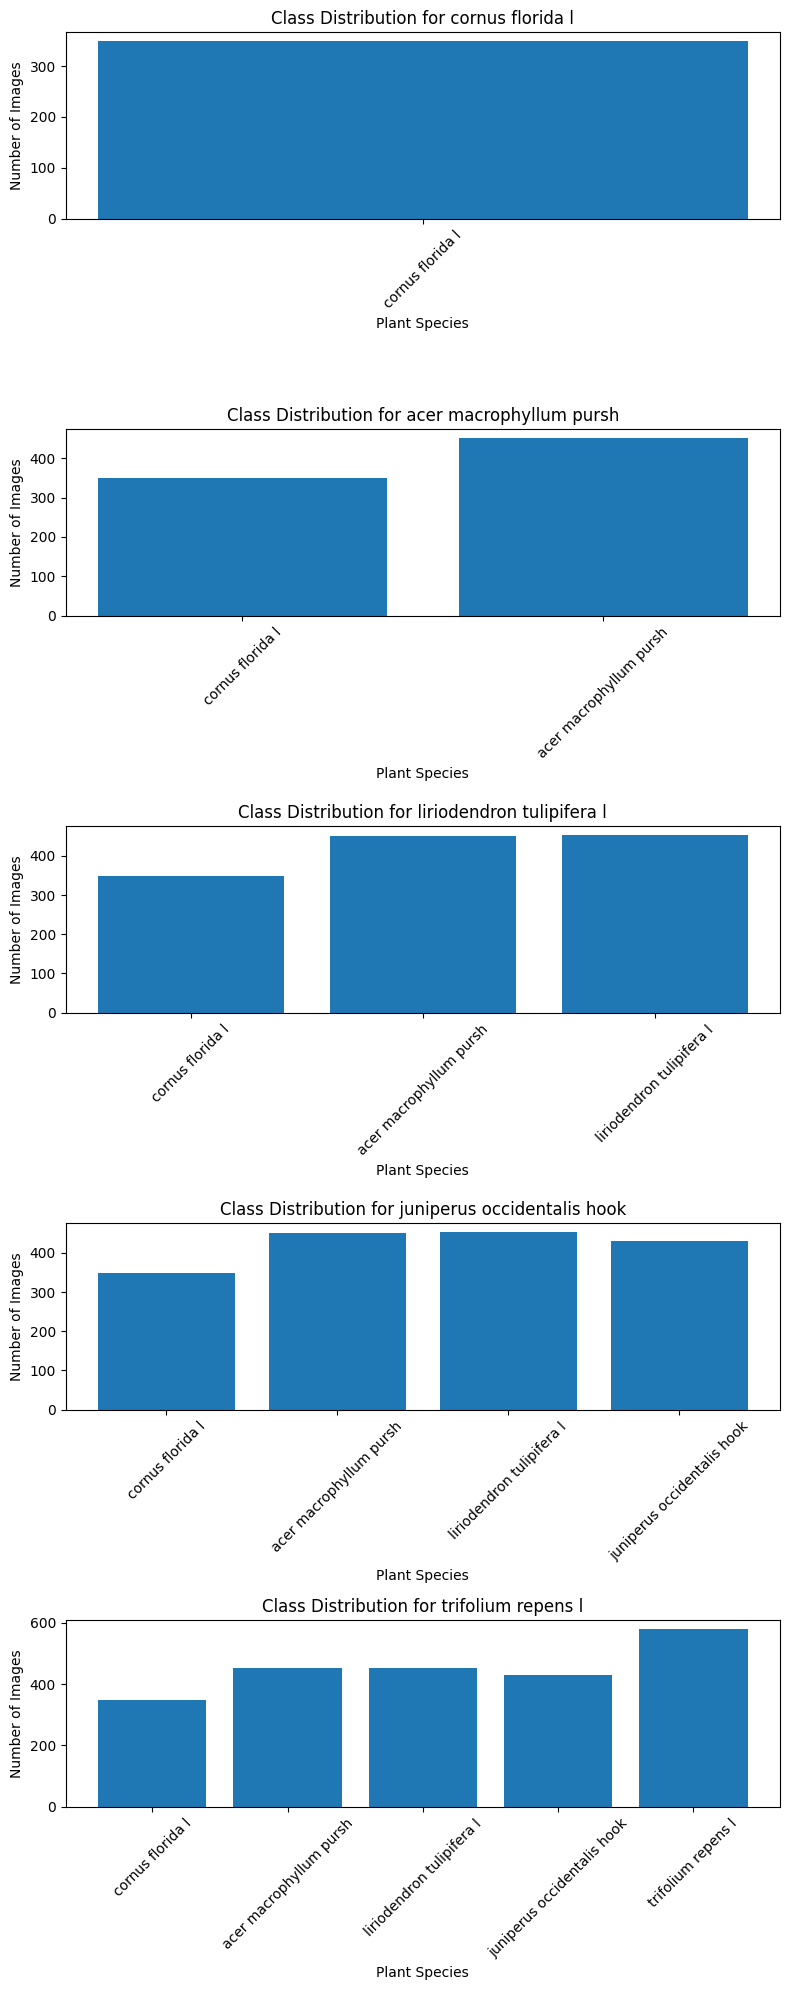

In [33]:
species_folders = os.listdir(data_directory)

# Initialize dictionaries to store species names and counts.
species_counts = {}

rows = len(species_folders)
cols = 1

# figure and axes for displaying the class distribution plots.
fig, axes = plt.subplots(rows, cols, figsize=(8, 4 * rows))

# Iterate through each species folder and calculate the class distribution.
for i, species_folder in enumerate(species_folders):
    species_path = os.path.join(data_directory, species_folder)
    image_files = [file for file in os.listdir(species_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

    # Count the number of images for each species.
    species_counts[species_folder] = len(image_files)

    # Plot the class distribution for the current species folder.
    axes[i].bar(species_counts.keys(), species_counts.values())
    axes[i].set_title(f'Class Distribution for {species_folder}')
    axes[i].set_xlabel('Plant Species')
    axes[i].set_ylabel('Number of Images')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()





In [47]:
species_folders

['cornus florida l',
 'acer macrophyllum pursh',
 'liriodendron tulipifera l',
 'juniperus occidentalis hook',
 'trifolium repens l']

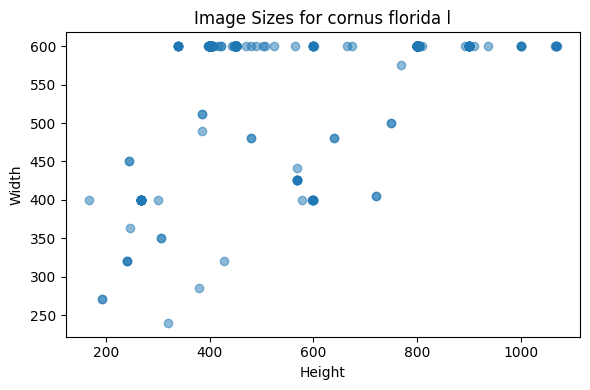

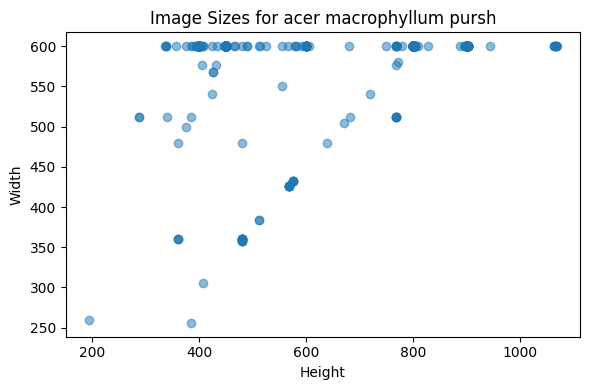

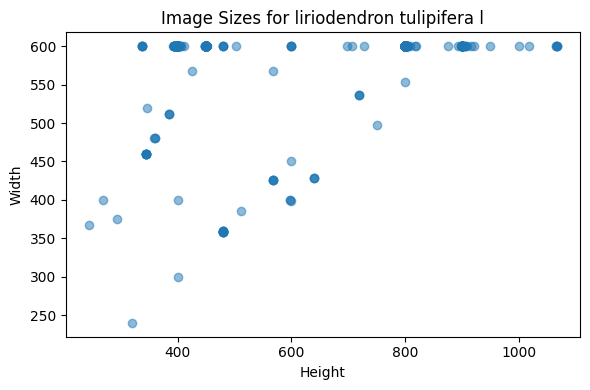

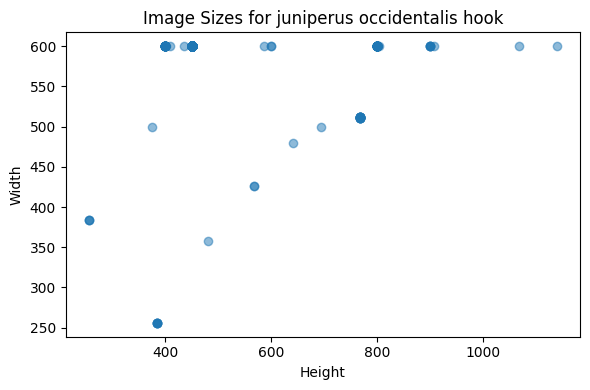

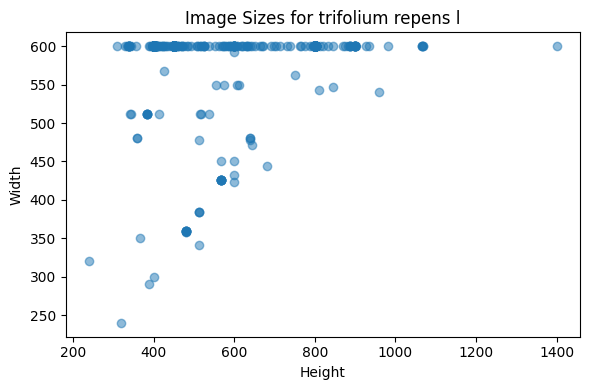

In [48]:
#Image stastics

# Get a list of plant species folders.
species_folders = os.listdir(data_directory)

# Iterate through each species folder and calculate image sizes.
for species_folder in species_folders:
    species_path = os.path.join(data_directory, species_folder)
    image_files = [file for file in os.listdir(species_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

    # Initialize lists to store image sizes for each species.
    heights, widths = [], []

    for image_file in image_files:
        image_path = os.path.join(species_path, image_file)
        image = cv2.imread(image_path)

        # Get image size (height and width).
        height, width, _ = image.shape
        heights.append(height)
        widths.append(width)

    # Visualize image sizes for the current species folder.
    plt.figure(figsize=(6, 4))
    plt.scatter(heights, widths, alpha=0.5)
    plt.title(f'Image Sizes for {species_folder}')
    plt.xlabel('Height')
    plt.ylabel('Width')

    plt.tight_layout()
    plt.show()



In [45]:
image_file

'187344.jpg'

In [54]:
folder_path

'/content/train_a_tensorflow-lite_model_for_identifying_plant_species/five_species/trifolium repens l'

In [55]:
data_directory

'/content/train_a_tensorflow-lite_model_for_identifying_plant_species/five_species'

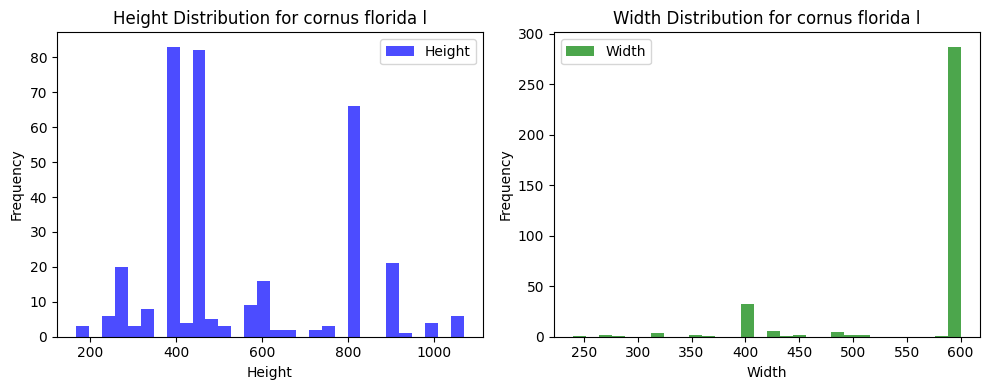

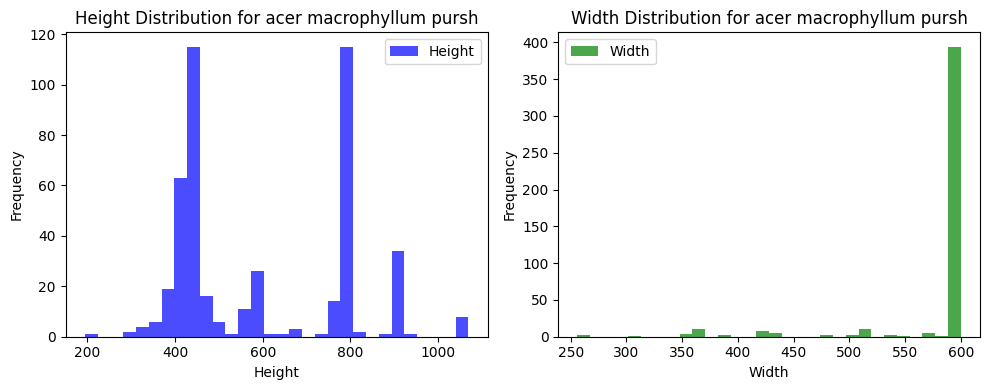

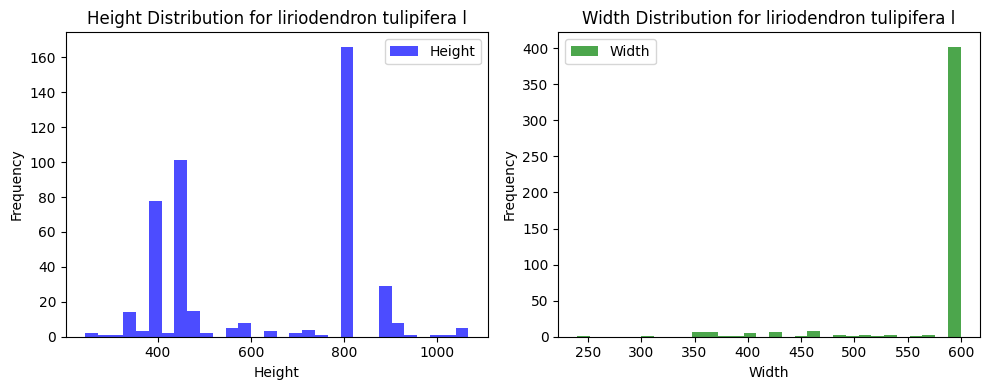

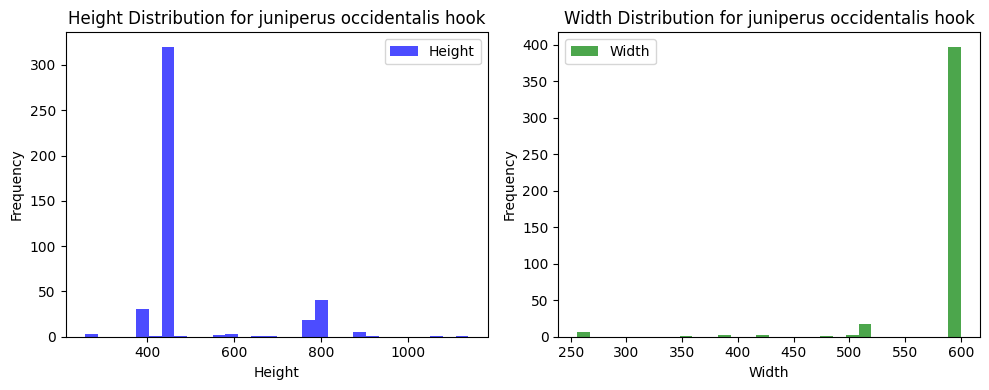

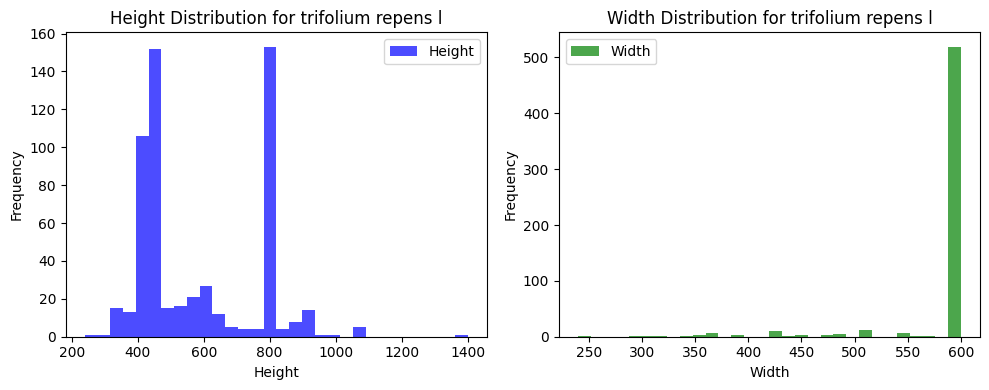

In [49]:
# Iterate through each species folder and calculate and visualize image sizes.
for species_folder in species_folders:
    species_path = os.path.join(data_directory, species_folder)
    image_files = [file for file in os.listdir(species_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

    # Initialize lists to store image sizes for each species.
    heights, widths = [], []

    for image_file in image_files:
        image_path = os.path.join(species_path, image_file)
        image = cv2.imread(image_path)

        # Get image size (height and width).
        height, width, _ = image.shape
        heights.append(height)
        widths.append(width)

    # Visualize the distribution of image sizes for the current species folder.
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(heights, bins=30, color='b', alpha=0.7, label='Height')
    plt.title(f'Height Distribution for {species_folder}')
    plt.xlabel('Height')
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(widths, bins=30, color='g', alpha=0.7, label='Width')
    plt.title(f'Width Distribution for {species_folder}')
    plt.xlabel('Width')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()
